## *Step 1: Import Required Libraries and Set Working Directory*

In [1]:

import os                                 
import numpy as np                        
import pandas as pd                    
import matplotlib.pyplot as plt           
import seaborn as sns                     
import missingno as msno                 
import joblib                             
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
os.chdir(r"C:\Users\asuma\Desktop\CKD_Project")
print("Current Working Directory:", os.getcwd())
RANDOM_STATE = 42                 
np.random.seed(RANDOM_STATE)
OUTPUT_DIR = 'outputs'                
os.makedirs(OUTPUT_DIR, exist_ok=True)  


Current Working Directory: C:\Users\asuma\Desktop\CKD_Project


## *Step 2: Load Dataset*

In [2]:
DATA_PATH = 'dataset/chronic_kidney_disease.csv'  # Relative path ensures portability
df = pd.read_csv(DATA_PATH)
print('Dataset loaded successfully. Shape:', df.shape)
print('Columns:', df.columns.tolist())
df.info()                        
df.describe(include='all')  
df.head(10)

Dataset loaded successfully. Shape: (400, 26)
Columns: ['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 n

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.describe(include='all') 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,44,92,49,2,5,3,2,2,2,3
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,41,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,258,362,317,323,339,248
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## *Step 3: Understand the Dataset and Perform Preprocessing*

In [4]:
df.drop(['id'], axis=1, inplace=True)

In [5]:

df.columns = [
    'age','blood_pressure','specific_gravity','albumin','sugar',
    'red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
    'blood_glucose_random','blood_urea','serum_creatinine','sodium','potassium',
    'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
    'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
    'pedal_edema','anemia','class'
]

In [6]:

df['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:

df['class'] = df['class'].replace("ckd\t", "ckd")
print("Unique values after cleaning:", df['class'].unique())

Unique values after cleaning: ['ckd' 'notckd']


In [8]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace('\tno','no')
df['diabetesmellitus'] = df['diabetesmellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'})

In [9]:
# Counter provides a compact summary of unique values and their frequency.
from collections import Counter
c = Counter 

In [10]:
catcols = set(df.dtypes[df.dtypes == 'O'].index.values)  # Fetch only object (categorical) columns
print("Initial Categorical Columns:", catcols)

Initial Categorical Columns: {'hypertension', 'diabetesmellitus', 'anemia', 'appetite', 'red_blood_cell_count', 'white_blood_cell_count', 'pus_cell_clumps', 'coronary_artery_disease', 'bacteria', 'packed_cell_volume', 'pedal_edema', 'class', 'red_blood_cells', 'pus_cell'}


In [11]:
contcols = set(df.dtypes[df.dtypes != 'O'].index.values)  # Fetch only numeric (continuous) columns
print("Initial Continuous Columns:", contcols)


Initial Continuous Columns: {'sodium', 'hemoglobin', 'serum_creatinine', 'potassium', 'blood_urea', 'albumin', 'sugar', 'age', 'blood_pressure', 'blood_glucose_random', 'specific_gravity'}


In [12]:
for i in catcols:
    print("Column:", i)
    print(c(df[i]))  # Compact summary of value frequencies
    print('*' * 120 + '\n')

Column: hypertension
Counter({'no': 251, 'yes': 147, nan: 2})
************************************************************************************************************************

Column: diabetesmellitus
Counter({'no': 261, 'yes': 136, nan: 2, ' yes': 1})
************************************************************************************************************************

Column: anemia
Counter({'no': 339, 'yes': 60, nan: 1})
************************************************************************************************************************

Column: appetite
Counter({'good': 317, 'poor': 82, nan: 1})
************************************************************************************************************************

Column: red_blood_cell_count
Counter({nan: 130, '5.2': 18, '4.5': 16, '4.9': 14, '4.7': 11, '3.9': 10, '4.8': 10, '4.6': 9, '3.4': 9, '3.7': 8, '5.0': 8, '6.1': 8, '5.5': 8, '5.9': 8, '3.8': 7, '5.4': 7, '5.8': 7, '5.3': 7, '4.3': 6, '4.2': 6, '5.6': 6, '4.4

In [13]:

catcols.remove('red_blood_cell_count')      # Remove numeric columns from categorical list
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print("Updated Categorical Columns:", catcols)

Updated Categorical Columns: {'hypertension', 'diabetesmellitus', 'anemia', 'appetite', 'pus_cell_clumps', 'coronary_artery_disease', 'bacteria', 'pedal_edema', 'class', 'red_blood_cells', 'pus_cell'}


In [14]:

for i in contcols:
    print("Continuous Column:", i)
    print(c(df[i]))  # Summarize frequency of each unique numeric value
    print('*' * 120 + '\n')

Continuous Column: sodium
Counter({135.0: 40, 140.0: 25, 141.0: 22, 139.0: 21, 142.0: 20, 138.0: 20, 137.0: 19, 136.0: 17, 150.0: 17, 147.0: 13, 145.0: 11, 132.0: 10, 146.0: 10, 131.0: 9, 144.0: 9, 133.0: 8, 130.0: 7, 134.0: 6, 143.0: 4, 127.0: 3, 124.0: 3, 114.0: 2, 125.0: 2, 128.0: 2, 122.0: 2, 113.0: 2, 120.0: 2, nan: 1, nan: 1, nan: 1, 111.0: 1, nan: 1, 104.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, 4.5: 1, nan: 1, 129.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 163.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 126.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 115.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1

In [15]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print("Updated Continuous Columns:", contcols)

Updated Continuous Columns: {'sodium', 'hemoglobin', 'serum_creatinine', 'potassium', 'blood_urea', 'age', 'blood_pressure', 'blood_glucose_random'}


In [16]:

contcols.add('red_blood_cell_count')
contcols.add('white_blood_cell_count')
contcols.add('packed_cell_volume')
print("Final Continuous Columns:", contcols)

Final Continuous Columns: {'sodium', 'hemoglobin', 'serum_creatinine', 'red_blood_cell_count', 'potassium', 'blood_urea', 'white_blood_cell_count', 'packed_cell_volume', 'age', 'blood_pressure', 'blood_glucose_random'}


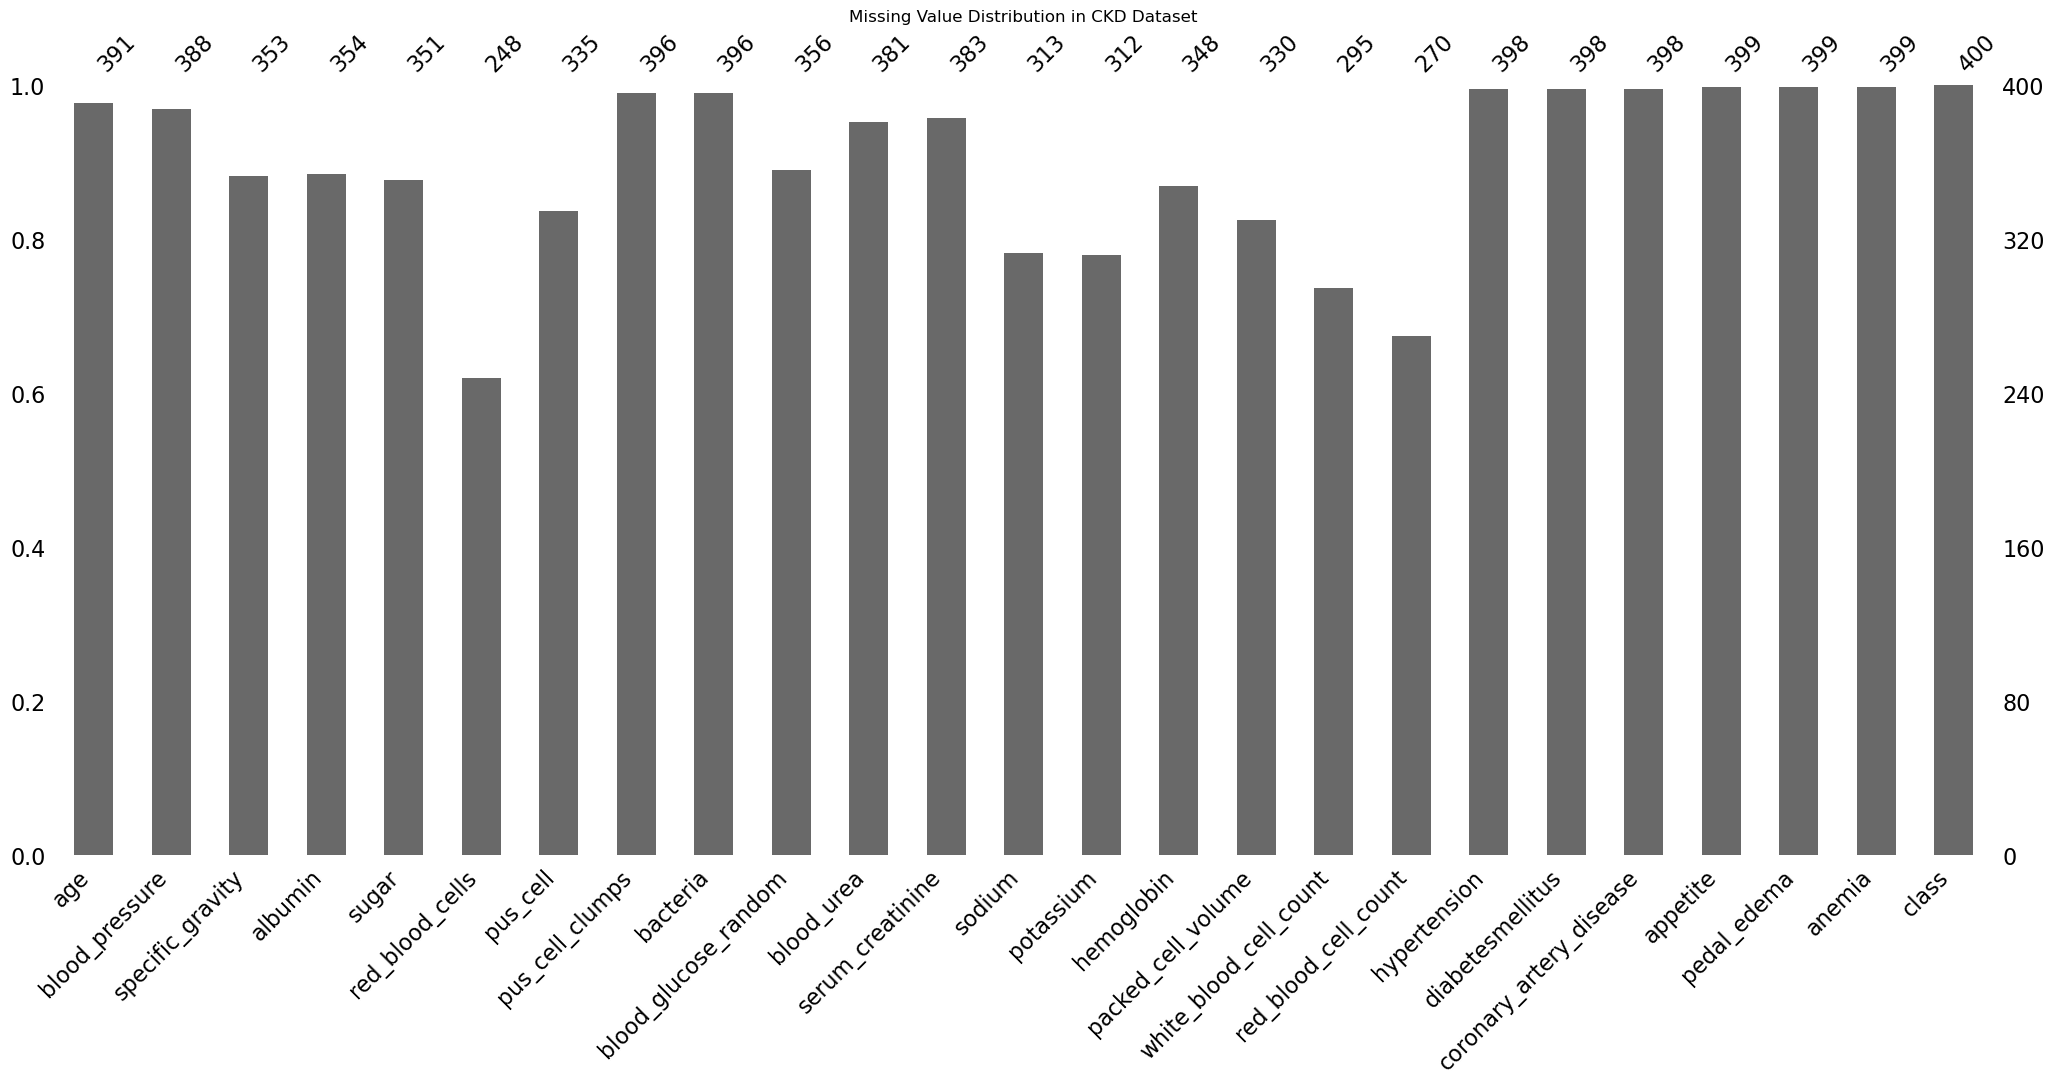

In [17]:

import missingno as msno
msno.bar(df)
plt.title("Missing Value Distribution in CKD Dataset")
plt.show()

In [18]:
# Convert numeric-looking string columns into proper numeric types
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [19]:
# Fill missing values in continuous features with their mean

df['blood_glucose_random'] = df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean())
df['blood_pressure'] = df['blood_pressure'].fillna(df['blood_pressure'].mean())
df['blood_urea'] = df['blood_urea'].fillna(df['blood_urea'].mean())
df['hemoglobin'] = df['hemoglobin'].fillna(df['hemoglobin'].mean())
df['packed_cell_volume'] = df['packed_cell_volume'].fillna(df['packed_cell_volume'].mean())
df['potassium'] = df['potassium'].fillna(df['potassium'].mean())
df['red_blood_cell_count'] = df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean())
df['serum_creatinine'] = df['serum_creatinine'].fillna(df['serum_creatinine'].mean())
df['sodium'] = df['sodium'].fillna(df['sodium'].mean())
df['white_blood_cell_count'] = df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean())  

In [20]:
# Fill missing categorical values with mode (most frequent value

df['age'] = df['age'].fillna(df['age'].mode()[0])
df['hypertension'] = df['hypertension'].fillna(df['hypertension'].mode()[0])
df['pus_cell_clumps'] = df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0])
df['appetite'] = df['appetite'].fillna(df['appetite'].mode()[0])
df['albumin'] = df['albumin'].fillna(df['albumin'].mode()[0])
df['pus_cell'] = df['pus_cell'].fillna(df['pus_cell'].mode()[0])
df['red_blood_cells']= df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0])
df['coronary_artery_disease'] = df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0])
df['bacteria']= df['bacteria'].fillna(df['bacteria'].mode()[0])
df['anemia'] = df['anemia'].fillna(df['anemia'].mode()[0])
df['sugar'] = df['sugar'].fillna(df['sugar'].mode()[0])
df['diabetesmellitus'] = df['diabetesmellitus'].fillna(df['diabetesmellitus'].mode()[0])
df['pedal_edema'] = df['pedal_edema'].fillna(df['pedal_edema'].mode()[0])
df['specific_gravity'] = df['specific_gravity'].fillna(df['specific_gravity'].mode()[0])

In [21]:
# Check if all missing values are handled
print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetesmellitus           0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64


In [22]:

catcols = [
    'anemia','pedal_edema','appetite','bacteria','class',
    'coronary_artery_disease','diabetesmellitus','hypertension',
    'pus_cell','pus_cell_clumps','red_blood_cells'
]

In [23]:
# Fix all inconsistent categories before encoding

df['diabetesmellitus'] = df['diabetesmellitus'].replace({'\tyes': 'yes', ' yes': 'yes', 'yessay': 'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace({'\tyes': 'yes'})
df['class'] = df['class'].replace({'ckd\t': 'ckd'})


# Manual mapping
mapping = {
    'anemia': {'no': 0, 'yes': 1},
    'pedal_edema': {'no': 0, 'yes': 1},
    'appetite': {'good': 0, 'poor': 1},
    'bacteria': {'notpresent': 0, 'present': 1},
    'coronary_artery_disease': {'no': 0, 'yes': 1},
    'diabetesmellitus': {'no': 0, 'yes': 1},
    'hypertension': {'no': 0, 'yes': 1},
    'pus_cell': {'normal': 0, 'abnormal': 1},
    'pus_cell_clumps': {'notpresent': 0, 'present': 1},
    'red_blood_cells': {'normal': 0, 'abnormal': 1},
    'class': {'notckd': 0, 'ckd': 1}
}

for col, m in mapping.items():
    df[col] = df[col].map(m)

In [24]:
df[mapping.keys()].head(20)
df[mapping.keys()].isnull().sum()

anemia                     0
pedal_edema                0
appetite                   0
bacteria                   0
coronary_artery_disease    0
diabetesmellitus           0
hypertension               0
pus_cell                   0
pus_cell_clumps            0
red_blood_cells            0
class                      0
dtype: int64

## *Step 4: Data Visualization*

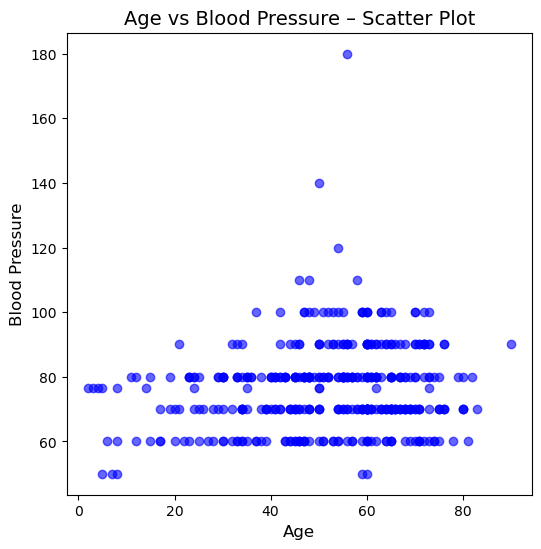

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(df['age'], df['blood_pressure'], color='blue', alpha=0.6)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Blood Pressure', fontsize=12)
plt.title('Age vs Blood Pressure – Scatter Plot', fontsize=14)
plt.show()

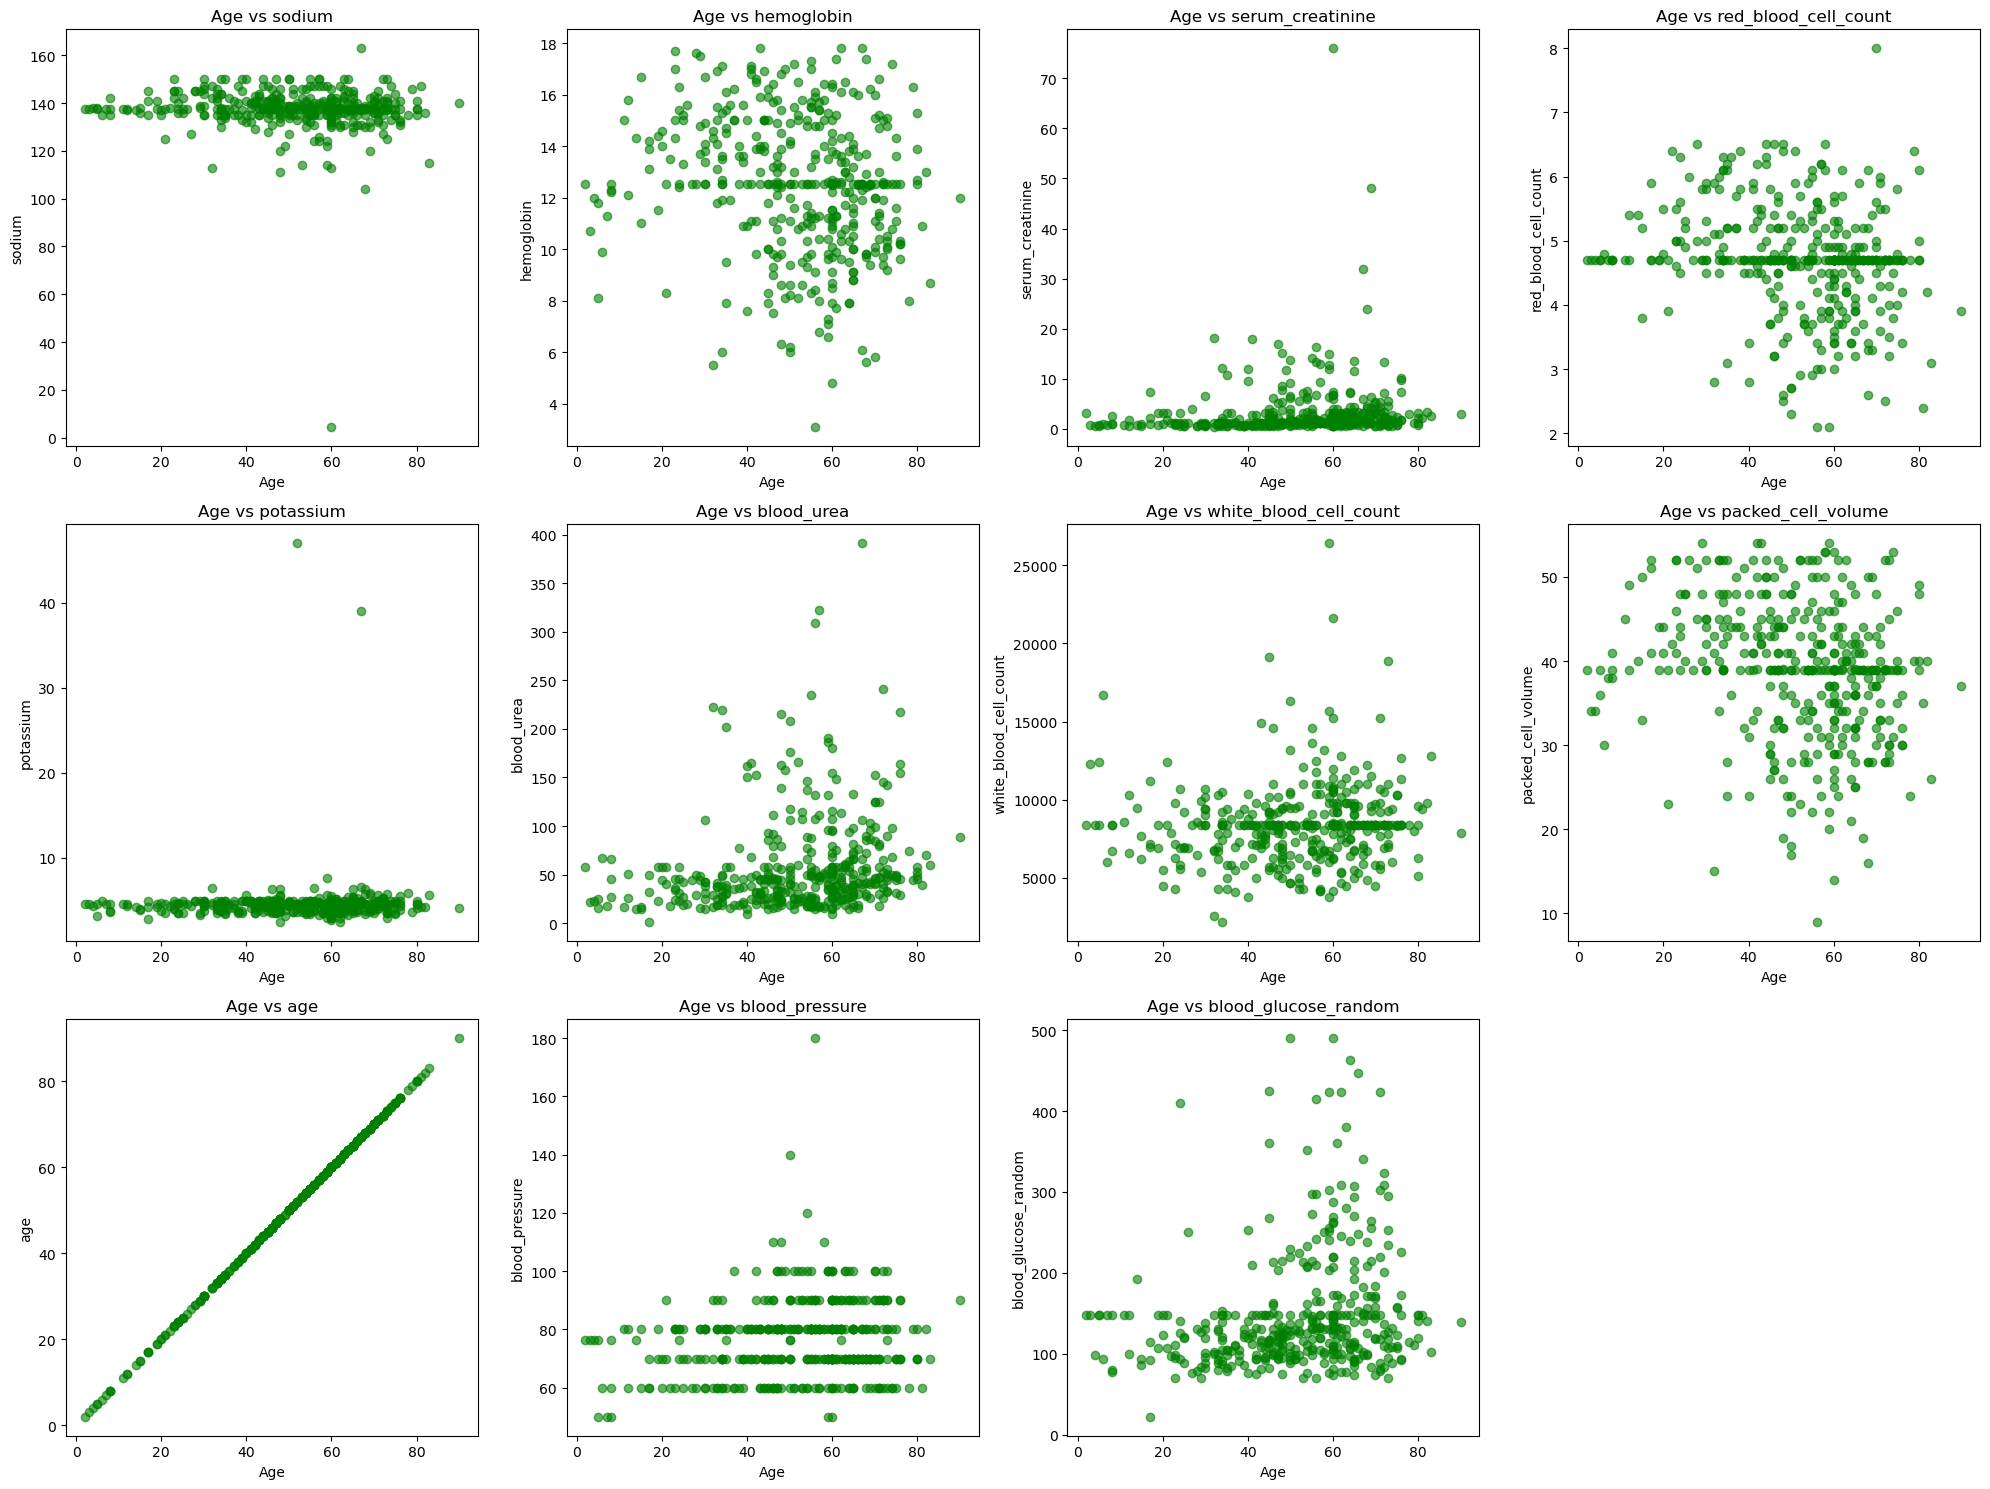

In [26]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber)
        plt.scatter(df['age'], df[column], color='green', alpha=0.6)
        plt.xlabel('Age', fontsize=10)
        plt.ylabel(column, fontsize=10)
        plt.title(f'Age vs {column}', fontsize=12)
    plotnumber += 1

plt.tight_layout()
plt.show()

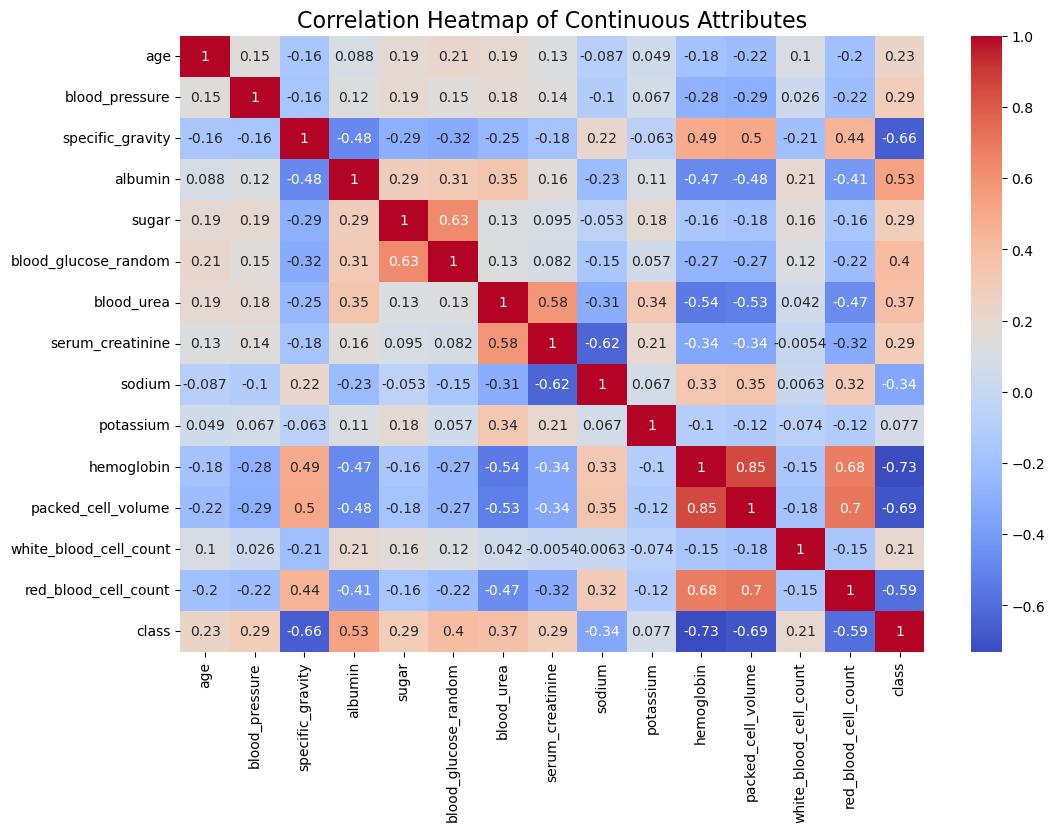

In [27]:
continuous_cols = ['age','blood_pressure','specific_gravity','albumin','sugar',
                   'blood_glucose_random','blood_urea','serum_creatinine',
                   'sodium','potassium','hemoglobin','packed_cell_volume',
                   'white_blood_cell_count','red_blood_cell_count','class']

plt.figure(figsize=(12,8))
sns.heatmap(df[continuous_cols].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Continuous Attributes', fontsize=16)
plt.show()

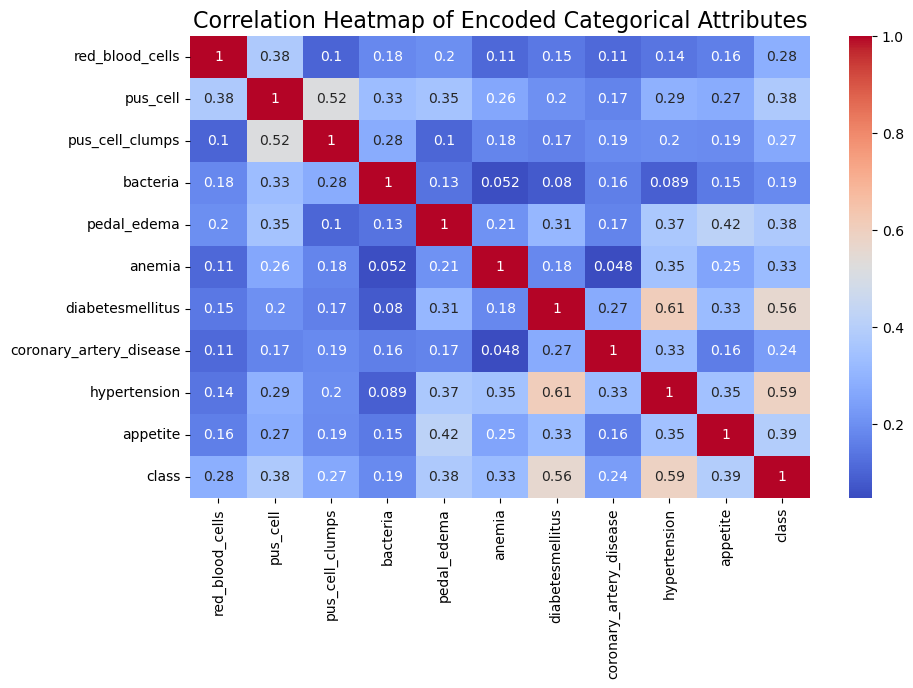

In [28]:
categorical_cols = ['red_blood_cells','pus_cell', 'pus_cell_clumps', 'bacteria', 'pedal_edema','anemia',
                    'diabetesmellitus','coronary_artery_disease',
                    'hypertension','appetite']

plt.figure(figsize=(10,6))
sns.heatmap(df[categorical_cols + ['class']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Encoded Categorical Attributes', fontsize=16)
plt.show()

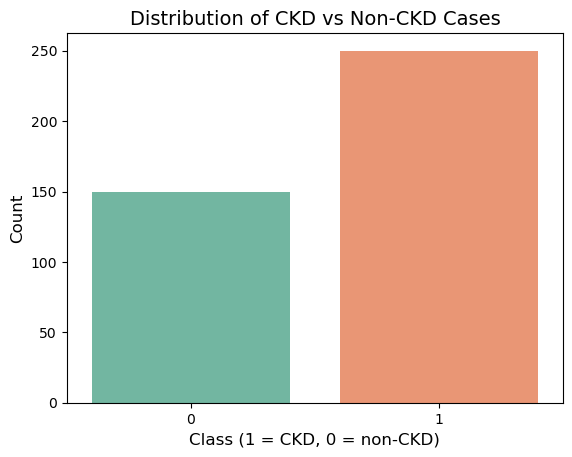

In [29]:

sns.countplot(data=df, x='class', hue='class', palette='Set2', legend=False)
plt.title('Distribution of CKD vs Non-CKD Cases', fontsize=14)
plt.xlabel('Class (1 = CKD, 0 = non-CKD)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


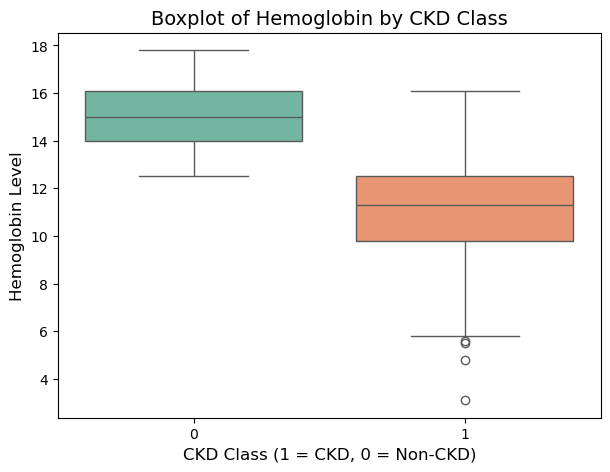

In [30]:

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='class', y='hemoglobin', hue='class', palette='Set2', legend=False)
plt.title('Boxplot of Hemoglobin by CKD Class', fontsize=14)
plt.xlabel('CKD Class (1 = CKD, 0 = Non-CKD)', fontsize=12)
plt.ylabel('Hemoglobin Level', fontsize=12)
plt.show()

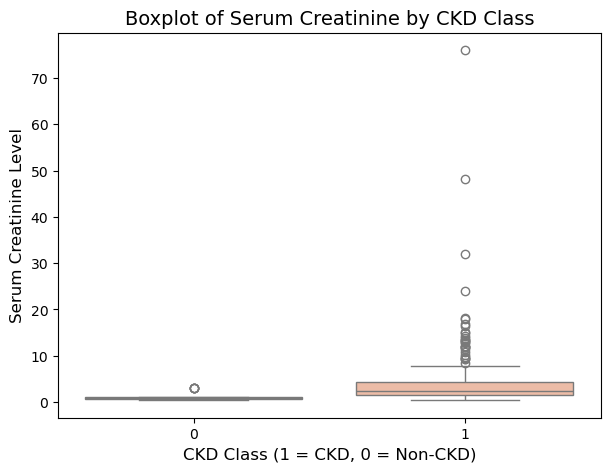

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='class', y='serum_creatinine', hue='class', palette='coolwarm', legend=False)
plt.title('Boxplot of Serum Creatinine by CKD Class', fontsize=14)
plt.xlabel('CKD Class (1 = CKD, 0 = Non-CKD)', fontsize=12)
plt.ylabel('Serum Creatinine Level', fontsize=12)
plt.show()

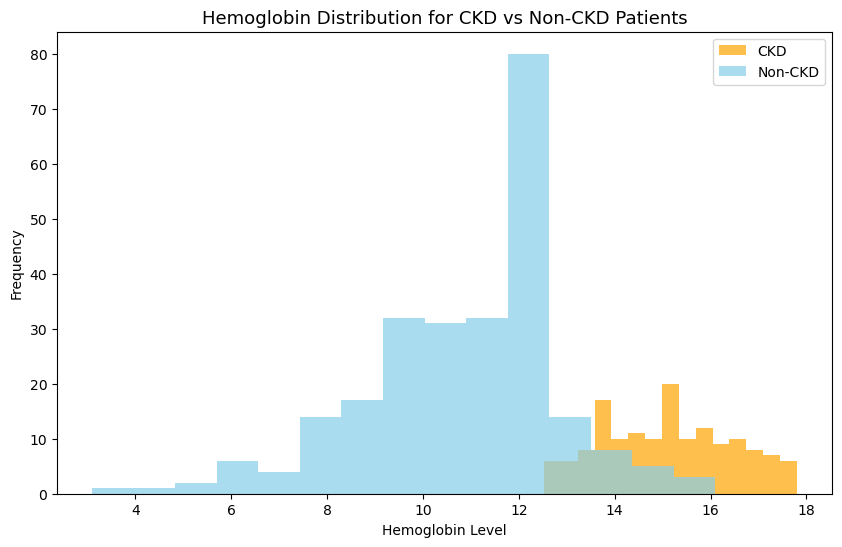

In [32]:

plt.figure(figsize=(10, 6))
plt.hist(df[df['class'] == 0]['hemoglobin'], bins=15, alpha=0.7, label='CKD', color='orange')
plt.hist(df[df['class'] == 1]['hemoglobin'], bins=15, alpha=0.7, label='Non-CKD', color='skyblue')
plt.title('Hemoglobin Distribution for CKD vs Non-CKD Patients', fontsize=13)
plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### *Step 3.1: Selecting Key Features for Model Training*


In [33]:
selected_features = [
    'age',
    'red_blood_cells',
    'pus_cell',
    'blood_glucose_random',
    'blood_urea',
    'pedal_edema',
    'anemia',
    'diabetesmellitus',
    'coronary_artery_disease'
]

X = df[selected_features]     # Independent variables
y = df['class']               # Target variable

X.to_csv("dataset/clean9.csv", index=False)
print("Clean 9-feature dataset saved!")

print("Shape of X:", X.shape)  
print("Shape of y:", y.shape)

Clean 9-feature dataset saved!
Shape of X: (400, 9)
Shape of y: (400,)


### *Step 3.3: Train–Test Splitting*

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (320, 9)
Testing shape: (80, 9)


### *Step 4: Training Machine Learning Models*

In [38]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
 
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
lr = LogisticRegression(max_iter=500)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [39]:
print("Decision Tree trained:", dt)
print("Random Forest trained:", rf)
print("Logistic Regression trained:", lr)

Decision Tree trained: DecisionTreeClassifier(random_state=42)
Random Forest trained: RandomForestClassifier(n_estimators=300, random_state=42)
Logistic Regression trained: LogisticRegression(max_iter=500)


### *Step 5: Model Evaluation*

In [40]:


models = {
    "Decision Tree": dt,
    "Random Forest": rf,
    "Logistic Regression": lr
}

for name, m in models.items():
    y_pred = m.predict(X_test)
    print("\nModel:", name)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC AUC  :", roc_auc_score(y_test, y_pred))


Model: Decision Tree
Accuracy : 0.9375
Precision: 0.9591836734693877
Recall   : 0.94
F1 Score : 0.9494949494949495
ROC AUC  : 0.9366666666666666

Model: Random Forest
Accuracy : 0.9625
Precision: 1.0
Recall   : 0.94
F1 Score : 0.9690721649484536
ROC AUC  : 0.97

Model: Logistic Regression
Accuracy : 0.95
Precision: 1.0
Recall   : 0.92
F1 Score : 0.9583333333333334
ROC AUC  : 0.96


### *Step 5.1: Confusion Matrix Visualization*


====== Confusion Matrix: Decision Tree ======
[[28  2]
 [ 3 47]]


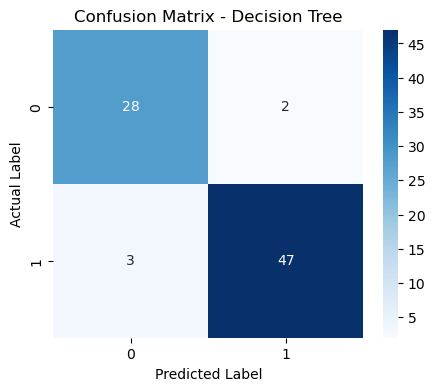


====== Confusion Matrix: Random Forest ======
[[30  0]
 [ 3 47]]


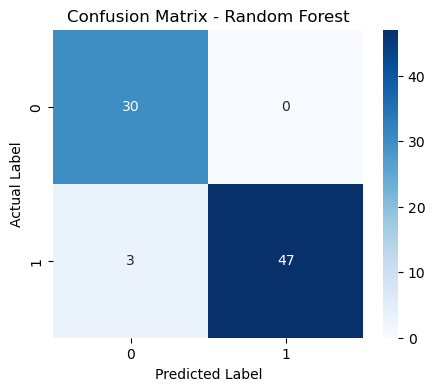


====== Confusion Matrix: Logistic Regression ======
[[30  0]
 [ 4 46]]


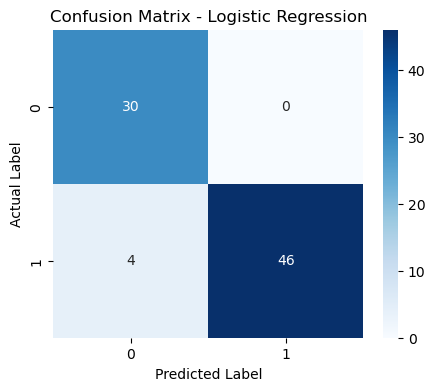

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Plot confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n====== Confusion Matrix: {name} ======")
    print(cm)

    # Heatmap
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.show()

    #Random Forest is the best model because it produces the lowest false negatives and highest true positives in the confusion matrix.
    # tn fp  fn tp

                   Feature  Importance
4               blood_urea    0.273621
3     blood_glucose_random    0.264770
7         diabetesmellitus    0.168114
0                      age    0.107952
2                 pus_cell    0.067007
5              pedal_edema    0.048934
6                   anemia    0.031482
1          red_blood_cells    0.031345
8  coronary_artery_disease    0.006776


C:\Users\asuma\AppData\Local\Temp\ipykernel_9596\2542362523.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


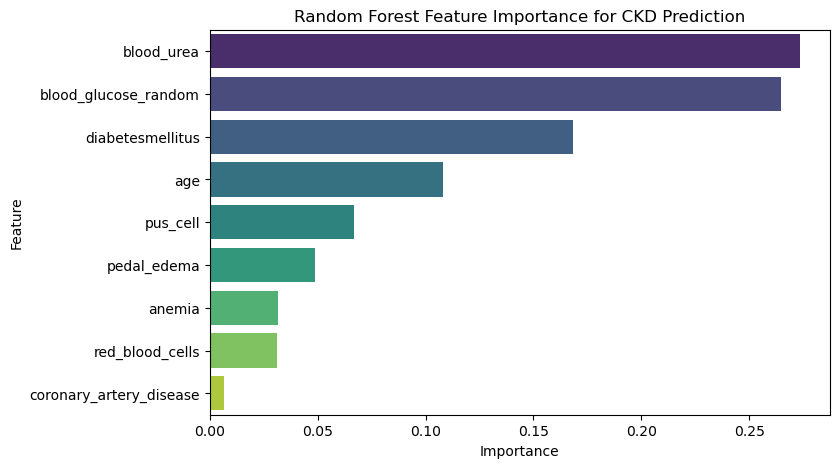

In [42]:
# Get feature importance values
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

# Plot the feature importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Random Forest Feature Importance for CKD Prediction")
plt.show()

### Step 6: Selecting the Best Performing Model & saving the final model

In [43]:
OUTPUT_DIR = 'model_outputs'
os.makedirs(OUTPUT_DIR, exist_ok=True)
best_model_path = os.path.join(OUTPUT_DIR, 'best_model.pkl')
joblib.dump(rf, "model_outputs/best_model.pkl")
print("Best model saved successfully!")

Best model saved successfully!


In [44]:
# Verify that the model is saved correctly and can be loaded again
loaded_model = joblib.load(best_model_path)
print("✅ Model loaded successfully!")
print("Model Type:", type(loaded_model))

✅ Model loaded successfully!
Model Type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [45]:
loaded_model = joblib.load("model_outputs/best_model.pkl")
print(loaded_model)

RandomForestClassifier(n_estimators=300, random_state=42)


In [46]:
import os
print(os.getcwd())

C:\Users\asuma\Desktop\CKD_Project


In [47]:
import sys
print(sys.executable)

C:\Users\asuma\anaconda3\python.exe
